# ANÁLISIS DE LA TEMPERATURA GLOBAL (Base de datos de Berkley)

<img src='https://lh3.googleusercontent.com/proxy/AWyHp5cPBpNZgRaVg2_4Ffb2BZpMJDPt6HqHLXEFqUH8b-HcynHcntXsSKxaNeiw5nv3SCdFpYbOOceWaJBPpGWWgAxx42yajMrR0srLkj31iybrb5tB_5VbY4iQv9OfehNXsv8TvgKP7S2veFs' alt='Logo UCM' align='left' width='20%'></img><img src='https://www.universidades.education/wp-content/uploads/2014/03/Universidad-Catolica-de-Manizales--308x188.png' alt='Logo UCM' align='center' width='20%'></img><br>
***
##  Técnicas y Aplicaciones de Teledetección: Cambio Climático-Riesgos y Desastres
***
###  Cambio climático: Análisis de la temperatura global
En este cuaderno vamos a explorar parte del contenido de la unidad:<br>
<ul>
    II. Integración de información para explicar relaciones causa y efecto.<br>
    III. Procesamiento de datos en la nube para el análisis de desastres.<br>
    VI. Análisis de Series Temporales de Datos en procesos relacionados con la biosfera.<br></ul>
Analizaremos los cambios en las temperaturas medias globales, así como el aumento de las concentraciones de CO2 en la atmósfera.<br>

<h1> NOTA:</h1> 
Recuerde que, Jupyter Notebook es una aplicación cliente/servidor que puede correr localmente en su navegador de Internet sin necesidad de tener una conexión a Internet. Sin embargo, al tratarse de una aplicación de red también puede ejecutarse remotamente a través de Internet.

### Análisis de la temperatura global
En este cuaderno vamos a utilizar el entorno de Python 3, el cual viene con muchas bibliotecas de análisis útiles instaladas. A continuación, importaremos las librerías necesarias para el ejercicio:

In [15]:
#Comencemos por importar las librerías que utilizaremos:

import numpy as np                    # algebra lineal 
import pandas as pd                   # manipulación y análisis de datos
import matplotlib.pyplot as plt       # crear visualizaciones
%matplotlib inline 
import plotly.offline as py           # amplia gama de opciones en gráficas
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go        # opciones de interactividad en gráficas
import plotly.tools as tls            # opciones de Python para importar taquigrafía
import seaborn as sns                 # opciones para visualizar distribuciones aleatorias

import time                           # Librería necesaria para incluir el módulo de tiempo
import warnings                       # entrega toda clase de advertencias al usuario
warnings.filterwarnings('ignore')


## Desarrollo:
### 1) Mapeo de temperaturas medias en los países

### Subir archivos desde tu sistema local de archivos:
El método files.upload devolverá un diccionario de los archivos que se han subido. Al diccionario se le asignará el nombre del archivo como clave y los valores serán los datos que se han subido.

In [8]:
# importamos los datos de Temperaturas globales de la tierra por país a Google Colab:
# recuerde que en la carpeta data pudes descargar el archivo "GlobalLandTemperaturesByCountry.csv" el cual importaremos en colab

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving GlobalLandTemperaturesByCountry.csv to GlobalLandTemperaturesByCountry (1).csv
Saving GlobalTemperatures.csv to GlobalTemperatures.csv
User uploaded file "GlobalLandTemperaturesByCountry.csv" with length 22680393 bytes
User uploaded file "GlobalTemperatures.csv" with length 205875 bytes


In [17]:
# Eliminemos los países duplicados (en el análisis, no consideramos la presencia de colonias en estos países), 
# así como para los países donde no hay información sobre la temperatura

global_temp_country = pd.read_csv('GlobalLandTemperaturesByCountry.csv')

global_temp_country_clear = global_temp_country[~global_temp_country['Country'].isin(
    ['Denmark', 'Antarctica', 'France', 'Europe', 'Netherlands',
     'United Kingdom', 'Africa', 'South America'])]

global_temp_country_clear = global_temp_country_clear.replace(
   ['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom'])

# Calculamos los promediemos de la temperatura de cada país

countries = np.unique(global_temp_country_clear['Country'])
mean_temp = []
for country in countries:
    mean_temp.append(global_temp_country_clear[global_temp_country_clear['Country'] == 
                                               country]['AverageTemperature'].mean())


    
data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = mean_temp,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = 'Temperatura \nMedia,\n°C')
            )
       ]

layout = dict(
    title = 'Temperatura superficial promedio por país',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

### Resultados:
Es posible notar que Rusia tiene una de las temperaturas medias más bajas (como Canadá). La temperatura más baja de Groenlandia (es claramente visible en el mapa). 
Localice el país más caluroso de África.<br>
¿Donde se encuentra?<br>
¿Como es respecto a tu país?

###  2) Ordene los países por la temperatura promedio en una gráfica de barra horizontal

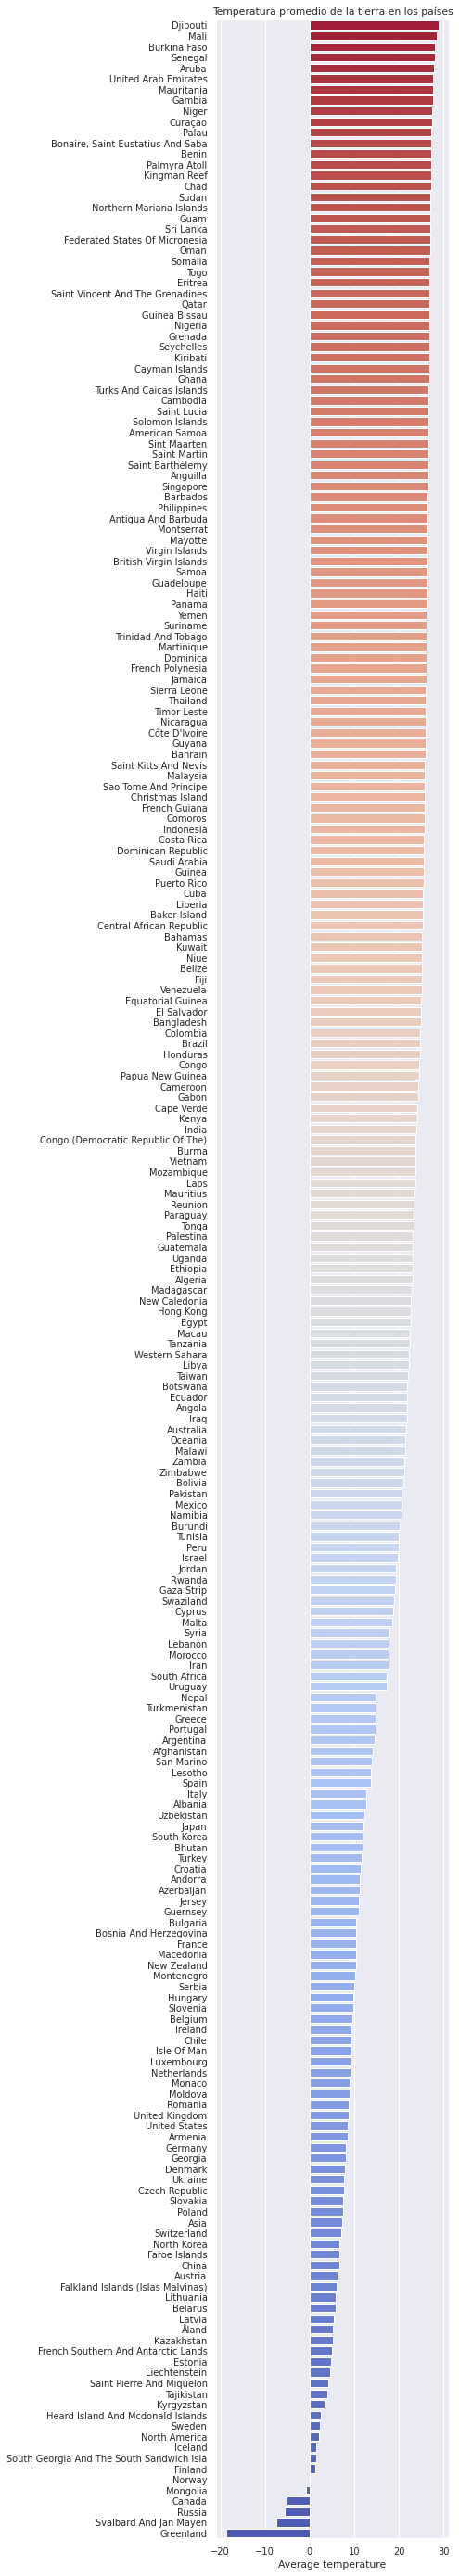

In [10]:
mean_temp_bar, countries_bar = (list(x) for x in zip(*sorted(zip(mean_temp, countries), 
                                                             reverse = True)))
sns.set(font_scale=0.9) 
f, ax = plt.subplots(figsize=(4.5, 50))
colors_cw = sns.color_palette('coolwarm', len(countries))
sns.barplot(mean_temp_bar, countries_bar, palette = colors_cw[::-1])
Text = ax.set(xlabel='Average temperature', title='Temperatura promedio de la tierra en los países')

###  3) ¿Encuentra alguna evidencia de calentamiento global?

Leamos los datos del archivo "GlobalTemperatures.csv", que tiene una temperatura mensual de la Tierra y grafíquelo. 

In [11]:
global_temp = pd.read_csv("GlobalTemperatures.csv")

#Extract the year from a date
years = np.unique(global_temp['dt'].apply(lambda x: x[:4]))
mean_temp_world = []
mean_temp_world_uncertainty = []

for year in years:
    mean_temp_world.append(global_temp[global_temp['dt'].apply(
        lambda x: x[:4]) == year]['LandAverageTemperature'].mean())
    mean_temp_world_uncertainty.append(global_temp[global_temp['dt'].apply(
                lambda x: x[:4]) == year]['LandAverageTemperatureUncertainty'].mean())

trace0 = go.Scatter(
    x = years, 
    y = np.array(mean_temp_world) + np.array(mean_temp_world_uncertainty),
    fill= None,
    mode='lines',
    name='Uncertainty top',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)
trace1 = go.Scatter(
    x = years, 
    y = np.array(mean_temp_world) - np.array(mean_temp_world_uncertainty),
    fill='tonexty',
    mode='lines',
    name='Uncertainty bot',
    line=dict(
        color='rgb(0, 255, 255)',
    )
)

trace2 = go.Scatter(
    x = years, 
    y = mean_temp_world,
    name='Average Temperature',
    line=dict(
        color='rgb(199, 121, 093)',
    )
)
data = [trace0, trace1, trace2]

layout = go.Layout(
    xaxis=dict(title='Año'),
    yaxis=dict(title='Temperatura media, °C'),
    title='Temperatura promedio de la tierra en el mundo <i>(en azul el valor de la Incertidumbre)</i>',
    showlegend = False)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

### Resultados:
En los gráficos se puede ver que hay un calentamiento global hoy en día. La temperatura media de la superficie terrestre tiene el valor más alto de los últimos tres siglos. ¡El crecimiento de temperatura más rápido ocurrió en los últimos 30 años! Esto es preocupante!!!, si no cambiamos a fuentes de energía ecológicas que reduzcan los aportes de CO2, estaremos expuestos a mayores desastres.<br>
Estos gráficos también tienen intervalos de confianza, lo que demuestra que la medición de la temperatura se ha vuelto más precisa en los últimos años.

###  4) Tendencias por continentes
Veamos el gráfico de cambios de temperatura anuales en ciertos continentes (tomamos en consideración un país por continente y marcamos Groenlandia como el lugar más frío de la Tierra).

In [12]:
continent = ['Russia', 'United States', 'Niger', 'Greenland', 'Australia', 'Bolivia']
mean_temp_year_country = [ [0] * len(years[70:]) for i in range(len(continent))]
j = 0
for country in continent:
    all_temp_country = global_temp_country_clear[global_temp_country_clear['Country'] == country]
    i = 0
    for year in years[70:]:
        mean_temp_year_country[j][i] = all_temp_country[all_temp_country['dt'].apply(
                lambda x: x[:4]) == year]['AverageTemperature'].mean()
        i +=1
    j += 1

traces = []
colors = ['rgb(0, 255, 255)', 'rgb(255, 0, 255)', 'rgb(0, 0, 0)',
          'rgb(255, 0, 0)', 'rgb(0, 255, 0)', 'rgb(0, 0, 255)']
for i in range(len(continent)):
    traces.append(go.Scatter(
        x=years[70:],
        y=mean_temp_year_country[i],
        mode='lines',
        name=continent[i],
        line=dict(color=colors[i]),
    ))

layout = go.Layout(
    xaxis=dict(title='Año'),
    yaxis=dict(title='Temperatura promedio, °C'),
    title='Temperatura promedio de la tierra en los continentes',)

fig = go.Figure(data=traces, layout=layout)
py.iplot(fig)

### Resultados:
Podemos ver que desde la década de 1980 se ha producido un aumento continuo de la temperatura media anual en los países, algo a tomar en consideración (se aprecia una dinámica particularmente fuerte en los países fríos).<br> 
Nota: La interrupción de los valores de temperatura en el gráfico se debe a la falta de observaciones en estos años.

###  5)  Mapa dinamico
Hagamos una visualización usando "plotly", para mostrar un cambio dinámico global.

Creemos un mapa que muestre los cambios en la temperatura promedio de los países con un período de 10 años.

In [13]:
# Extraiga el año de una fecha
years = np.unique(global_temp_country_clear['dt'].apply(lambda x: x[:4]))

# Creemos una matriz y agreguemos los valores de las temperaturas promedio en los países cada 10 años
mean_temp_year_country = [ [0] * len(countries) for i in range(len(years[::10]))]

j = 0
for country in countries:
    all_temp_country = global_temp_country_clear[global_temp_country_clear['Country'] == country]
    i = 0
    for year in years[::10]:
        mean_temp_year_country[i][j] = all_temp_country[all_temp_country['dt'].apply(
                lambda x: x[:4]) == year]['AverageTemperature'].mean()
        i +=1
    j += 1

In [14]:
# Creemos un Streaming en Plotly (puede que no funcione bien en Colab, dado que la función Stream no corre en offline)
#  stream_tokens = tls.get_credentials_file () ['stream_ids']
#  token = stream_tokens [-1]
#  stream_id = dict (token = token, maxpoints = 60)

data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = mean_temp,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '',
            title = 'Promedio\nTemperatura,\n°C'),
        #The following line is also needed to create Stream
        #stream = stream_id
            )
       ]

layout = dict(
    title = 'Temperatura promedio de la tierra en los países',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        type = 'equirectangular'
    ),
)

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='world_temp_map')

### Resultados:
Es posible notar que Rusia tiene una de las temperaturas medias más bajas (como Canadá). La temperatura más baja de Groenlandia (es claramente visible en el mapa).<br>
Los resultados evidencian una tendencia de aumento global de la temperatura promedio, que comenzó a registrarse hace mucho tiempo, la precisión de las observaciones aumenta con el paso de los años, eso es bastante natural.<br> 
La humanidad debe reflexionar y tomar todas las medidas necesarias para reducir las emisiones de gases de efecto invernadero a la atmósfera.<br> 
Este trabajo se realizó en su totalidad utilizando Python y la gran biblioteca para la visualización de datos."plotly".

### Responda:
Localice el país más caluroso de África.<br>
¿Donde se encuentra?<br>
¿Como es respecto a tu país?<br>
¿Es posible graficar las temperaturas máximas por país?